Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('US_Accidents_June20.csv')

Algemene explorative data

In [2]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,False,True,False,Day,Day,Day,Day


In [3]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

Basisstatistieken voor numerieke kolommen:
                TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.478818e+06  3.513617e+06  3.513617e+06  3.513617e+06  1.034799e+06   
mean   2.080226e+02  2.339929e+00  3.654195e+01 -9.579151e+01  3.755758e+01   
std    2.076627e+01  5.521935e-01  4.883520e+00  1.736877e+01  4.861215e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.363784e+01 -1.174418e+02  3.399477e+01   
50%    2.010000e+02  2.000000e+00  3.591687e+01 -9.102601e+01  3.779736e+01   
75%    2.010000e+02  3.000000e+00  4.032217e+01 -8.093299e+01  4.105139e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.034799e+06  3.513617e+06  1.250753e+06    3.447885e+06   
mean  -1.004560e+02  2.816167e-01  5.975383e+03    6.193512e+01   
std    1.852879e+01  1.550134e+00  1.496624e

df schoonmaken 

In [4]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

specifieke slechte data aantekeningen

In [ ]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

In [5]:
# Get columns with missing values and the number of missing values in each column
columns_with_missing_values = df.columns[df.isnull().any()]
missing_values_per_column = df[columns_with_missing_values].isnull().sum()

# Iterate through columns with missing values and print the information
for column in columns_with_missing_values:
    missing_count = missing_values_per_column[column]
    print(f'"{column}" heeft {missing_count} missende waardes')

"TMC" heeft 1034799 missende waardes
"End_Lat" heeft 2478818 missende waardes
"End_Lng" heeft 2478818 missende waardes
"Description" heeft 1 missende waardes
"Number" heeft 2262864 missende waardes
"City" heeft 112 missende waardes
"Zipcode" heeft 1069 missende waardes
"Timezone" heeft 3880 missende waardes
"Airport_Code" heeft 6758 missende waardes
"Weather_Timestamp" heeft 43323 missende waardes
"Temperature(F)" heeft 65732 missende waardes
"Wind_Chill(F)" heeft 1868249 missende waardes
"Humidity(%)" heeft 69687 missende waardes
"Pressure(in)" heeft 55882 missende waardes
"Visibility(mi)" heeft 75856 missende waardes
"Wind_Direction" heeft 58874 missende waardes
"Wind_Speed(mph)" heeft 454609 missende waardes
"Precipitation(in)" heeft 2025874 missende waardes
"Weather_Condition" heeft 76138 missende waardes
"Sunrise_Sunset" heeft 115 missende waardes
"Civil_Twilight" heeft 115 missende waardes
"Nautical_Twilight" heeft 115 missende waardes
"Astronomical_Twilight" heeft 115 missende w

Data op landelijke schaal (Bart)

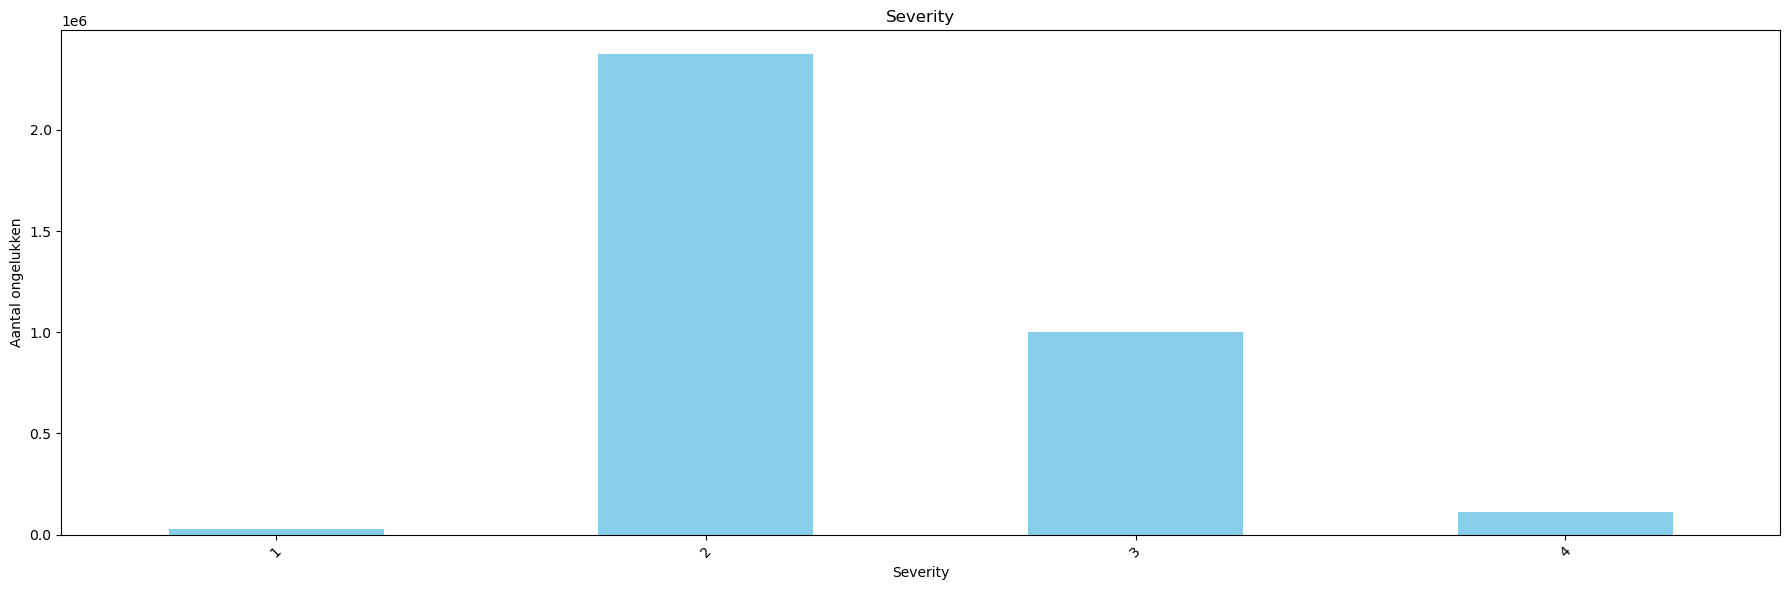

In [6]:
state_accident_counts = df['Severity'].value_counts()
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Severity')
plt.xlabel('Severity')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [7]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

Basisstatistieken voor numerieke kolommen:
                TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.478818e+06  3.513617e+06  3.513617e+06  3.513617e+06  1.034799e+06   
mean   2.080226e+02  2.339929e+00  3.654195e+01 -9.579151e+01  3.755758e+01   
std    2.076627e+01  5.521935e-01  4.883520e+00  1.736877e+01  4.861215e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.363784e+01 -1.174418e+02  3.399477e+01   
50%    2.010000e+02  2.000000e+00  3.591687e+01 -9.102601e+01  3.779736e+01   
75%    2.010000e+02  3.000000e+00  4.032217e+01 -8.093299e+01  4.105139e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.034799e+06  3.513617e+06  1.250753e+06    3.447885e+06   
mean  -1.004560e+02  2.816167e-01  5.975383e+03    6.193512e+01   
std    1.852879e+01  1.550134e+00  1.496624e

In [ ]:
# Boxplot van 'Severity' vs. 'Temperature(F)'
plt.figure(figsize=(8, 5))
sns.boxplot(x='Severity', y='Temperature(F)', data=df)
plt.title('Boxplot van Severity vs. Temperature(F)')
plt.xlabel('Severity')
plt.ylabel('Temperature(F)')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df)
plt.title('Paired Boxplots van Sunrise_Sunset en Severity')
plt.xlabel('Sunrise_Sunset')
plt.ylabel('Severity')
plt.show()

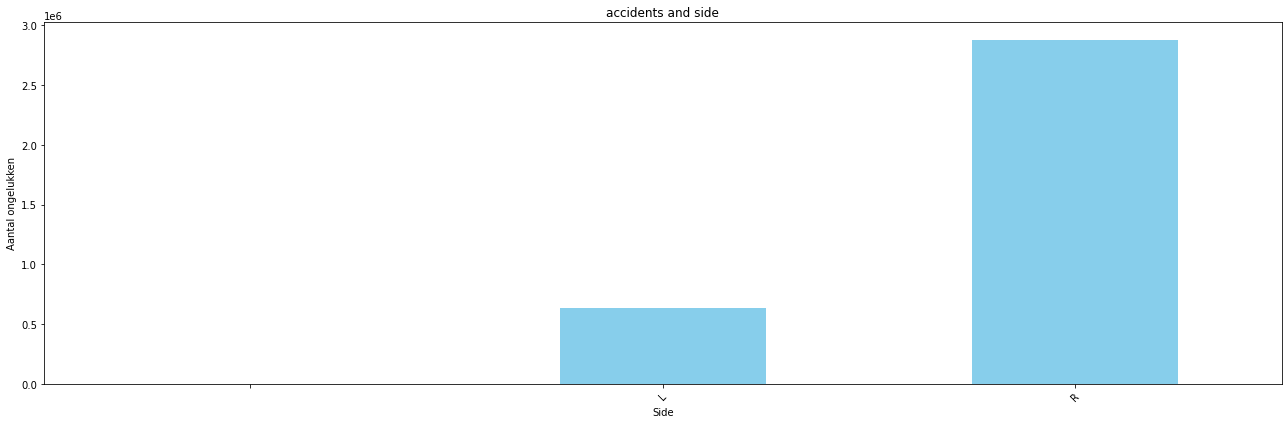

In [ ]:
state_accident_counts = df['Side'].value_counts().head(60)
state_accident_counts = state_accident_counts.sort_index(ascending=True)

plt.figure(figsize=(18, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('accidents and side')
plt.xlabel('Side')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Quint 


In [ ]:
df_places = df[['Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']]

In [ ]:
df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


/var/folders/6b/rhfs1dgj5jv3bq1s3qxjzx280000gn/T/ipykernel_66042/4072891996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_places['Place_accident'] = df_places.apply(lambda row: ','.join([col for col in df_places.columns if row[col]]), axis=1)


In [ ]:
df_places.head(10)

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Place_accident
0,False,False,False,False,False,False,False,False,False,False,False,False,
1,False,False,False,False,False,False,False,False,False,False,False,False,
2,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
3,False,False,False,False,False,False,False,False,False,False,False,False,
4,False,False,False,False,False,False,False,False,False,False,True,False,Traffic_Signal
5,False,False,False,False,False,False,False,False,False,False,False,False,
6,False,False,False,False,False,False,False,False,False,False,False,False,
7,False,False,False,False,False,False,False,False,False,False,False,False,
8,False,False,False,False,False,False,False,False,False,False,False,False,
9,False,False,False,False,False,False,False,False,False,False,False,False,


In [ ]:
# Drivers per state, kaggle Data set

df_drivers_by_state = pd.read_csv('Licensed_drivers_By_State.csv')
print(df_drivers_by_state)


       Year  Gender    Cohort       State  Drivers
0      2017    Male  Under 16     Alabama      0.0
1      2017    Male  Under 16      Alaska      0.0
2      2017    Male  Under 16     Arizona      0.0
3      2017    Male  Under 16    Arkansas      0.0
4      2017    Male  Under 16  California      0.0
...     ...     ...       ...         ...      ...
57829  2018  Female     65-69     Wyoming  16061.0
57830  2018  Female     70-74     Wyoming  11804.0
57831  2018  Female     75-79     Wyoming   7770.0
57832  2018  Female     80-84     Wyoming   4715.0
57833  2018  Female       85+     Wyoming   3456.0

[57834 rows x 5 columns]


In [ ]:
# Calculate sum per state


sum_per_state = df_drivers_by_state.groupby('State')['Drivers'].sum()
sum_per_state_sorted = sum_per_state.sort_values(ascending=False)
print(sum_per_state_sorted)

#Test123

State
California              576317897.0
Texas                   362911317.0
Florida                 332206242.0
New York                278903109.0
Pennsylvania            214285552.0
Illinois                202089002.0
Ohio                    197074002.0
Michigan                174597232.0
North Carolina          155971968.0
Georgia                 150907550.0
New Jersey              146079208.0
Virginia                131059091.0
Washington              118755159.0
Massachusetts           116153834.0
Indiana                 112910836.0
Tennessee               110096934.0
Missouri                101008854.0
Arizona                 100843536.0
Wisconsin                98554261.0
Maryland                 91949382.0
Alabama                  91094599.0
Colorado                 85660123.0
South Carolina           78281683.0
Minnesota                77805906.0
Louisiana                75567250.0
Kentucky                 70926827.0
Oregon                   67021988.0
Connecticut           

In [ ]:
sum_per_state_sorted.columns =['State', 'Licensed_Drivers']
print(sum_per_state_sorted)

State
California              576317897.0
Texas                   362911317.0
Florida                 332206242.0
New York                278903109.0
Pennsylvania            214285552.0
Illinois                202089002.0
Ohio                    197074002.0
Michigan                174597232.0
North Carolina          155971968.0
Georgia                 150907550.0
New Jersey              146079208.0
Virginia                131059091.0
Washington              118755159.0
Massachusetts           116153834.0
Indiana                 112910836.0
Tennessee               110096934.0
Missouri                101008854.0
Arizona                 100843536.0
Wisconsin                98554261.0
Maryland                 91949382.0
Alabama                  91094599.0
Colorado                 85660123.0
South Carolina           78281683.0
Minnesota                77805906.0
Louisiana                75567250.0
Kentucky                 70926827.0
Oregon                   67021988.0
Connecticut           

In [ ]:
df_main = df.merge(sum_per_state_sorted, on='State', how='left')
df_main.head()


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Drivers
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,NaN
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,NaN
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,NaN
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,NaN
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,NaN


Data op individuele staten (Quint & Doena)

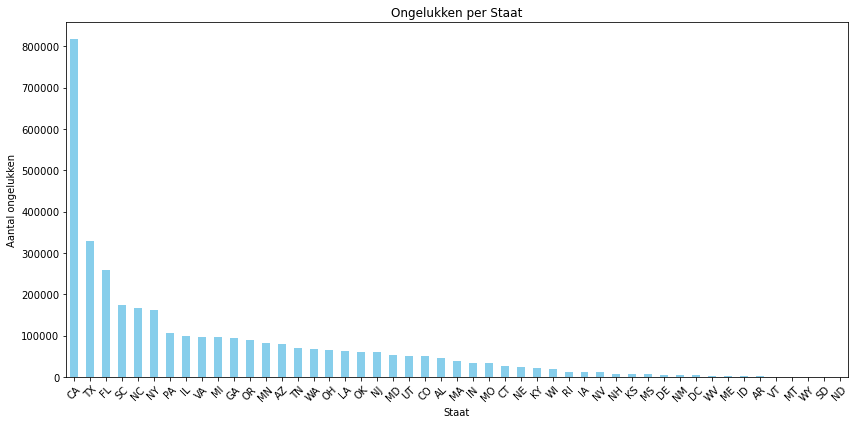

In [ ]:
state_accident_counts = df['State'].value_counts()

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Staat')
plt.xlabel('Staat')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


Doena: 

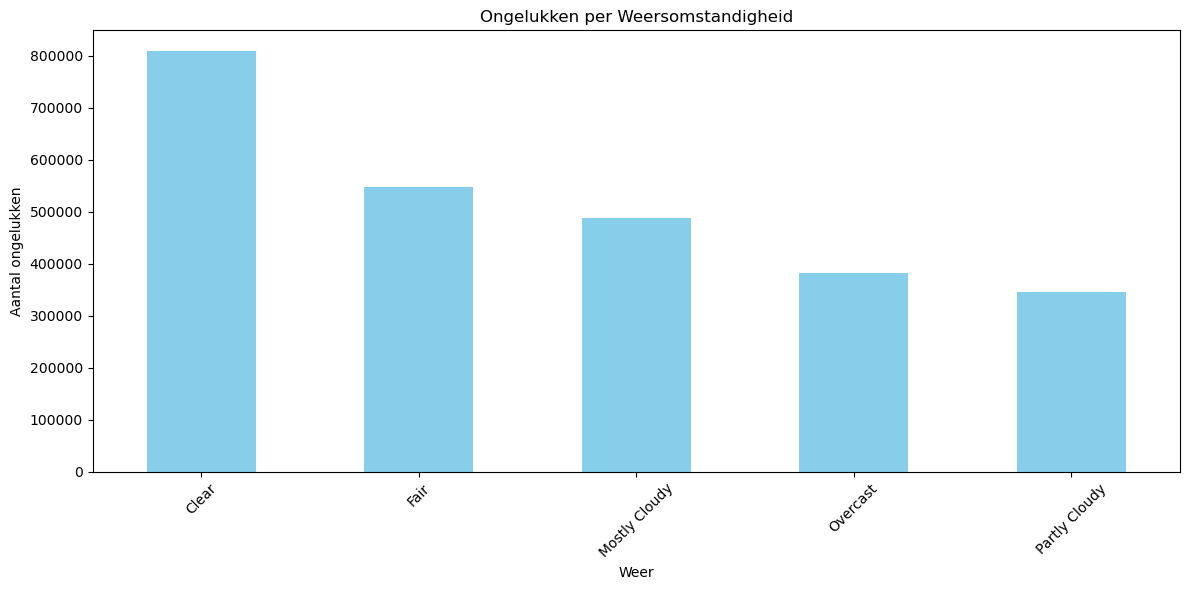

In [14]:
# Aantal ongelukken per weersomstandigheid 
state_accident_counts = df['Weather_Condition'].value_counts().head(20)

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()


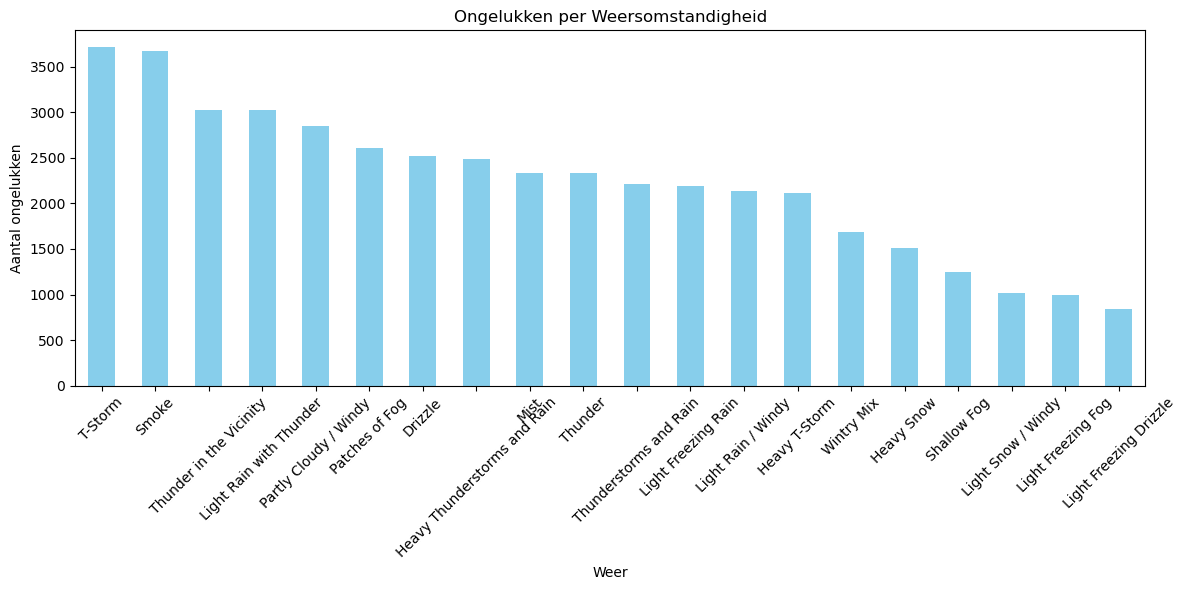

In [21]:
# Aantal ongelukken per weersomstandigheid zonder de eerste 20

state_accident_counts = df['Weather_Condition'].value_counts()
ignore_biggest_values = state_accident_counts[20:].head(20)

plt.figure(figsize=(12, 6))
ignore_biggest_values.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [104]:
# drop na values 
df_weather = df.dropna(subset=['Weather_Condition'])

In [105]:
df_weather['Weather_Condition'].unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
       'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
       'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
       'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle',
       'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
       'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
       'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
       'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
       'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
       'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
       'Light Rain Shower', 'Light Rain with Thunder',
       'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
       'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
       'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
       'Light Thunderstorms and Snow', 'Hea

In [138]:
# Get all the unique values that contain the string 'Rain'
rainy_weather = df_weather[df_weather['Weather_Condition'].str.contains('cloud', case=False)]
rainy_weather["Weather_Condition"].unique()

array(['Mostly Cloudy', 'Scattered Clouds', 'Partly Cloudy', 'Cloudy',
       'Mostly Cloudy / Windy', 'Partly Cloudy / Windy', 'Funnel Cloud',
       'Cloudy / Windy'], dtype=object)

In [131]:
# Create a function that puts a weather condition into a new category such as 'Sunny'

condition_mapping = {
    'Tornado': ['tornado'],
    'Thunder': ['thunder'],
    
    'Sand storm': ['sand', 'sandy'],

    'Freeze and rain' : ['Light Freezing Rain / Windy'],
    'Freeze': ['freeze', 'freezing'],
    
    'Fog' : ['fog', 'foggy'],
    'Misty' : ['misty', 'mist'],
    'Hail': ['hail'],
    'Snow': ['snow', 'snowy'],
    'Stormy': ['storm', 'stormy', 'rain / windy', 'Light Rain Shower / Windy'],
    
    'Windy' : ['wind'],

    'Heavy Rain' : ['heavy rain'],
    'Rain': ['rain', 'shower', 'drizzle', 'light rain'],
    

    'Cloudy': ['cloudy', 'overcast', 'clouds'],

    
    'Sunny': ['sunny', 'clear', 'fair'],

     }

def categorize_weather(description):
    for condition, keywords in condition_mapping.items():
        for keyword in keywords:
            if keyword in str(description).lower():
                return condition
    return 'Other'

print(categorize_weather('Light freezing rain'))

Freeze


In [132]:
df_weather['Weather_Condition_Useful'] = df_weather['Weather_Condition'].apply(categorize_weather)

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_4451/1695639879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather['Weather_Condition_Useful'] = df_weather['Weather_Condition'].apply(categorize_weather)


In [135]:
df_weather['Weather_Condition_Useful'].head(10)

0      Rain
1      Rain
2    Cloudy
3    Cloudy
4    Cloudy
5      Rain
6    Cloudy
7    Cloudy
8    Cloudy
9      Rain
Name: Weather_Condition_Useful, dtype: object

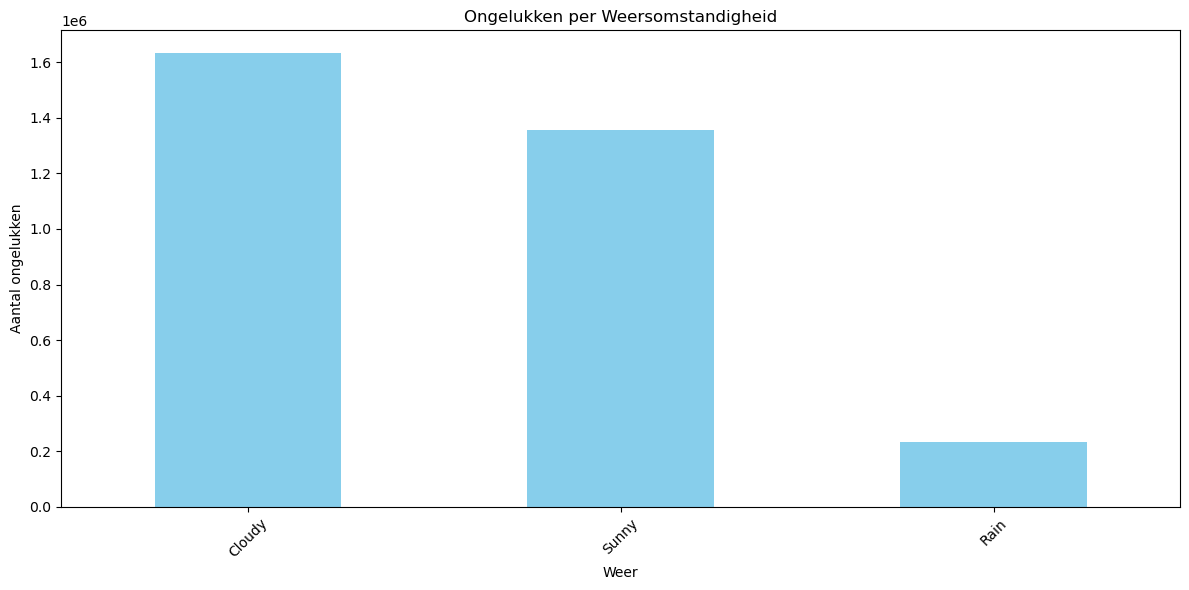

In [139]:
# Aantal ongelukken per weersomstandigheid 
state_accident_counts = df_weather['Weather_Condition_Useful'].value_counts().head(3)

plt.figure(figsize=(12, 6))
state_accident_counts.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [140]:
df_weather.head()



,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition_Useful
0,A-1,MapQuest,201.0,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Night,Rain
1,A-2,MapQuest,201.0,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,...,False,False,False,False,False,Night,Night,Night,Day,Rain
2,A-3,MapQuest,201.0,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,...,False,False,False,True,False,Night,Night,Day,Day,Cloudy
3,A-4,MapQuest,201.0,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,...,False,False,False,False,False,Night,Day,Day,Day,Cloudy
4,A-5,MapQuest,201.0,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,...,False,False,False,True,False,Day,Day,Day,Day,Cloudy


We will now plot the number of accidents in California per day. To see wether there are days where a lot of accidents happen. On those days, we will check what weather it was that day. By doing this, we could get more insight into the effect of weather on the number of accidents. 

We choose California simply because we want to select a place where many accidents happen so our data set is big enough. 

In [146]:
# Change the data types of the columns to datetime datatype 
df_weather["Start_Time"] = pd.to_datetime(df_weather['Start_Time'])

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_4451/3263497011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather["Start_Time"] = pd.to_datetime(df_weather['Start_Time'])


In [150]:
df_weather["Start_Time"].dt.date.head()

0    2016-02-08
1    2016-02-08
2    2016-02-08
3    2016-02-08
4    2016-02-08
Name: Start_Time, dtype: object

In [155]:
# the number of accidents in "California" per day
df_weather_california = df_weather[df_weather["State"] == 'CA']

In [161]:
# Create new column
df_weather_california["Days"] = df_weather_california["Start_Time"].dt.date
df_weather_california.head()


/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_4451/2439433078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weather_california["Days"] = df_weather_california["Start_Time"].dt.date


,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Weather_Condition_Useful,Day,Days
728,A-729,MapQuest,201.0,3,2016-06-21 10:34:40,2016-06-21 11:04:40,38.085300,-122.233017,NaN,NaN,...,False,False,False,Day,Day,Day,Day,Sunny,21,2016-06-21
729,A-730,MapQuest,201.0,3,2016-06-21 10:30:16,2016-06-21 11:16:39,37.631813,-122.084167,NaN,NaN,...,False,False,False,Day,Day,Day,Day,Sunny,21,2016-06-21
730,A-731,MapQuest,201.0,2,2016-06-21 10:49:14,2016-06-21 11:19:14,37.896564,-122.070717,NaN,NaN,...,False,False,False,Day,Day,Day,Day,Sunny,21,2016-06-21
731,A-732,MapQuest,201.0,3,2016-06-21 10:41:42,2016-06-21 11:11:42,37.334255,-122.032471,NaN,NaN,...,False,False,False,Day,Day,Day,Day,Sunny,21,2016-06-21
732,A-733,MapQuest,201.0,2,2016-06-21 10:16:26,2016-06-21 11:04:16,37.250729,-121.910713,NaN,NaN,...,False,False,False,Day,Day,Day,Day,Sunny,21,2016-06-21


In [166]:
# groupby 'Days'
grouped = df_weather_california.groupby("Days").count()

In [167]:
#CA_accident_counts = df_weather_california['Start_Time'].value_counts()

plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

/var/folders/yh/33yqy_7x1gjcxjv3xt8g622c0000gn/T/ipykernel_4451/1394614195.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x600 with 0 Axes>

KeyboardInterrupt: 

In [ ]:
#CA_accident_counts = df_weather_california['Start_Time'].value_counts()

plt.figure(figsize=(12, 6))
grouped.plot(kind='bar', color='skyblue')
plt.title('Ongelukken per Weersomstandigheid')
plt.xlabel('Weer')
plt.ylabel('Aantal ongelukken')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

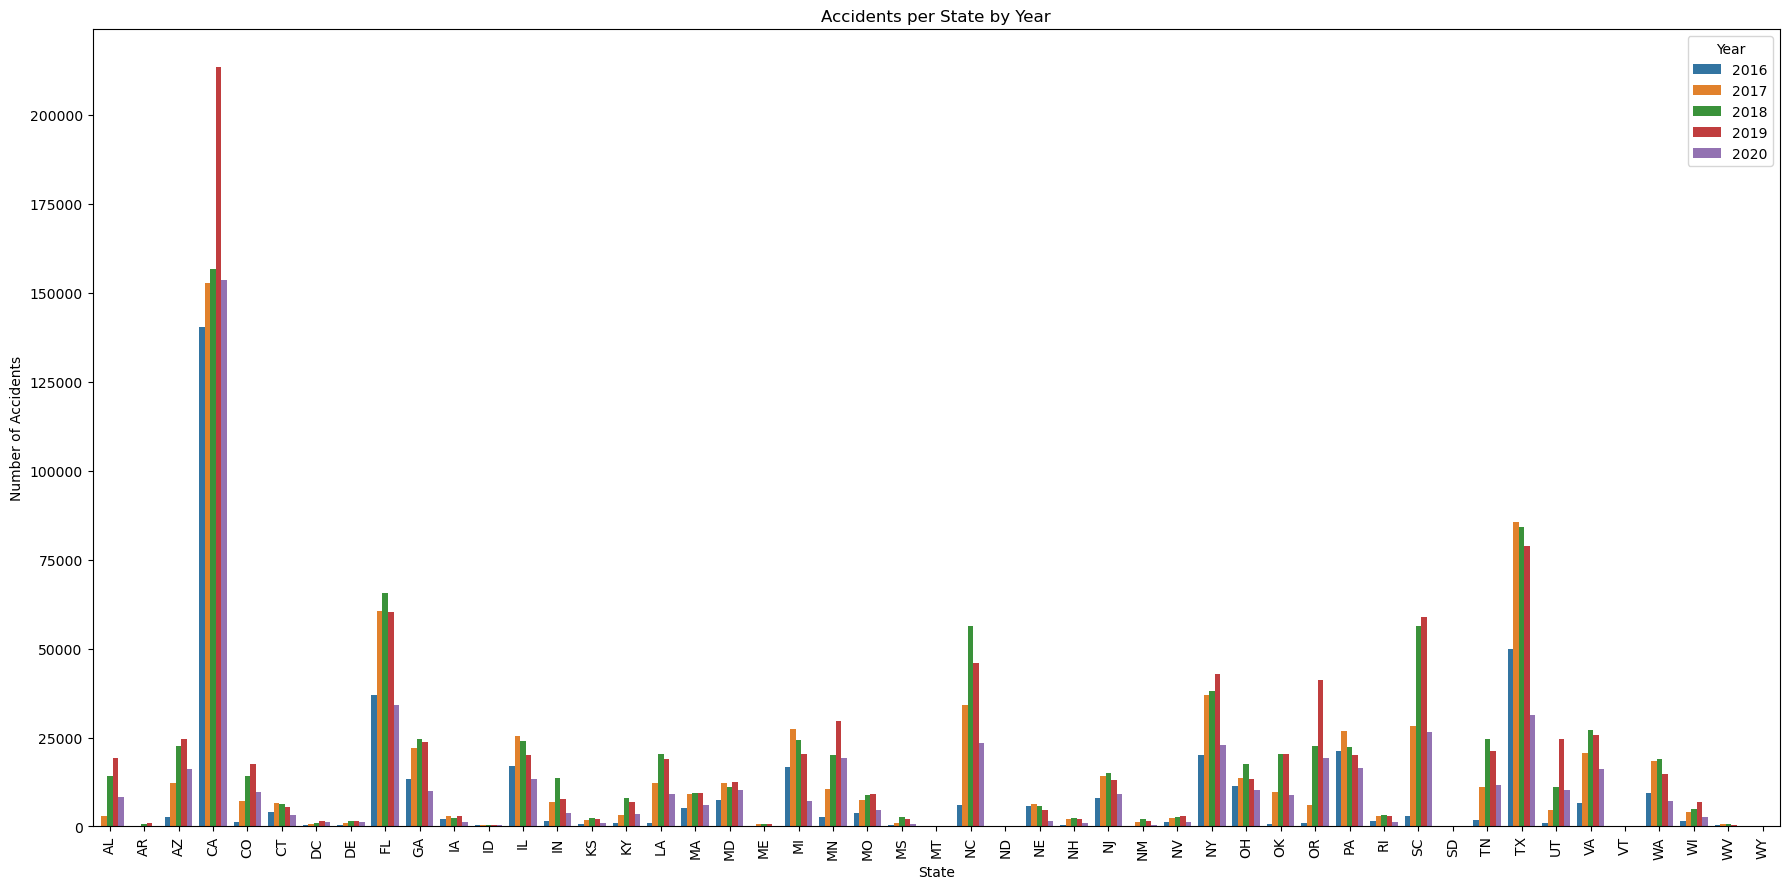

In [141]:
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Group by 'State', 'Year', and calculate the accident counts
state_year_accident_counts = df.groupby(['State', 'Year']).size().reset_index(name='accident_count')

plt.figure(figsize=(18, 9))

# Create a bar chart using seaborn with 'State' on the x-axis and 'Year' as hue
sns.barplot(data=state_year_accident_counts, x='State', y='accident_count', hue='Year')

plt.title('Accidents per State by Year')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=90)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

Isabel:

In [ ]:
#leuk coderen

Sophia met weer enzo:

In [ ]:
#leuker coderen